# Project Group - 33

Members: Amber van der Helm, Femke Tamsma, Merel Loman, Naomi Rottier, and Robin Karthaus

Student numbers: 5164303, 5122422, 4852982, 5496462, 5634563

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

The bin packing is an Operational Research (OR) technique. It is similar to the knapsack problem, however the knapsack problem is a maximization problem where the purpose is to fill a fixed-size knapsack with the most valuable items. Whereas in the bin packing problem all items should be assigned and the purpose is to minimize the number of used bins. 

Throughout the supply chain various applications can be found where a bin packing problem is encountered. From assigning cargo to airplanes or containers to assigning packages to trucks. 

The objective for this research is a model that is able to optimize the allocation of packages to vehicles. This is first done with one type of vehicle with the same characteristics. From this model the model will be extended so it can optimize the same problem with different types of vehicles that can be used and eventually the emissions of the vehicles will be considered as well. Even more applications can be added to extend the model to become more realistic. An example is not allocating all packages from one day but to differentiate in parts of the day and that packages from certain time slots are used, instead of all packages available.  

The data set from the "Amazon Last Mile Routing Challenge Dataset" will be used. This data contains information about the dimension of the packages being delivered. The data will first be imported to Python and converted from a JSON file to a CSV file. Missing values will either be deleted or replaced by the average values, depending on the outcomes of the descriptive analysis. To simplify the model, the three dimensions (length, width, height), will be converted to a new variable (column) "volume" in cm3. Since the dimension of the vans is also in cm3, optimizing the bin packing algorithm will be possible. After these first data processing steps, the data will be further cleaned by checking for outliers and deleting these if necessary. Also a general view of the data will be formed by descriptive statistics and corresponding visualizations (box plots, normal distributions, histograms, scatter plots, etc.). 

When all the data is cleaned and a general view of the data is formed the algorithm will be written. This algorithm will be a bin packing algorithm which optimizes the allocation/loading of the vans. This algorithm will be written in different steps. First many assumptions will be made to keep the algorithm as simple as possible (for example, only one van at a time can be loaded). When the model runs correctly, the algorithm will be made more complex by adding more constraints and making less assumptions. Each "complexity step" in the model will be monitored separately and give insight into the capacity of the model of optimizing the loading more optimally. A visualization regarding the decrease in total needed vans per increase in model complexity will be created. 

The research question used in this assignment is: "Is it possible to optimize the allocation of packages, given by the Amazon dataset, to vans using a binpacking algorithm, where model complexity steps are taken into account and visualization of these complexity steps are done with advanced visualisation?"

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1** (Amber): importing data as a dataframe

**Author 2** (Femke): visualization possibilities 

**Author 3** (Merel): importing data as a dataframe

**Author 4** (Naomi): checking other projects and RQs

**Author 5** (Robin): visualization possibilities

# Data Import

We have used two datasets from Amazon to get the dimensions of the packages and delivery vans. The first dataset "package_data.json" gives us information about the dimensions of the packages, which will be used to compute the volume for each package. The second dataset "route_data.json" will be used to obtain the volume capacity of th delivery vehicle. More documentation can be found here: https://github.com/MIT-CAVE/rc-cli/blob/main/templates/data_structures.md. 

First, the necessary libraries will be imported and these two datasets will be opened before creating the dataframe.

In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt

json_file_path_package = 'package_data.json'

with open(json_file_path_package, 'r') as file:
    data_package = json.load(file)

json_file_path_route = 'route_data.json'

with open(json_file_path_route, 'r') as file:
    data_route = json.load(file)

After loading our datasets, it is stored in a way that we can use it for our research question. First, the json data of the packages will be put in a dataframe.

In [8]:
# Initialize empty lists for each column
package_ids = []
scan_statuses = []
start_times = []
end_times = []
service_times = []
depths = []
heights = []
widths = []
stop_ids = []
route_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_package.items():
    for stop_id, stop_data in route_data.items():
        for package_id, package_data in stop_data.items():
            package_ids.append(package_id)
            scan_statuses.append(package_data.get("scan_status", ""))
            time_window = package_data.get("time_window", {})
            start_times.append(time_window.get("start_time_utc", ""))
            end_times.append(time_window.get("end_time_utc", ""))
            service_times.append(package_data.get("planned_service_time_seconds", ""))
            dimensions = package_data.get("dimensions", {})
            depths.append(dimensions.get("depth_cm", ""))
            heights.append(dimensions.get("height_cm", ""))
            widths.append(dimensions.get("width_cm", ""))
            stop_ids.append(stop_id)
            route_ids.append(route_id)

# Create a pandas DataFrame from the extracted data
df_package = pd.DataFrame({
    "PackageID": package_ids,
    "ScanStatus": scan_statuses,
    "StartTimeUTC": start_times,
    "EndTimeUTC": end_times,
    "PlannedServiceTimeSeconds": service_times,
    "DepthCM": depths,
    "HeightCM": heights,
    "WidthCM": widths,
    "StopID": stop_ids,
    "RouteID": route_ids
})

# Display the resulting DataFrame
df_package.head(5)


,PackageID,ScanStatus,StartTimeUTC,EndTimeUTC,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM,StopID,RouteID
0,PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea,DELIVERED,NaN,NaN,59.3,25.4,7.6,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
1,PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,59.3,25.4,12.7,17.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
2,PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07,DELIVERED,NaN,NaN,59.3,39.4,7.6,31.8,AD,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
3,PackageID_15c6a204-ec5f-4ced-9c3d-472316cc7759,DELIVERED,2018-07-27 16:00:00,2018-07-28 00:00:00,27.0,30.0,3.0,27.4,AF,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77
4,PackageID_3b28f781-242e-416e-9575-84c7188b8208,DELIVERED,NaN,NaN,45.0,25.4,12.7,17.8,AG,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77


Now that the data of the packages is loaded into a dataframe, the second json file will be converted to a dataframe in order to get useful route data.  

In [9]:
# Initialize empty lists for each column
route_ids = []
station_codes = []
dates = []
departure_times = []
executor_capacities = []
route_scores = []
stop_ids = []
lats = []
lngs = []
types = []
zone_ids = []

# Iterate through the JSON data to extract information
for route_id, route_data in data_route.items():
    station_code = route_data.get("station_code", "")
    date = route_data.get("date_YYYY_MM_DD", "")
    departure_time_utc = route_data.get("departure_time_utc", "")
    executor_capacity_cm3 = route_data.get("executor_capacity_cm3", "")
    route_score = route_data.get("route_score", "")
    
    stops = route_data.get("stops", {})
    for stop_id, stop_data in stops.items():
        lat = stop_data.get("lat", "")
        lng = stop_data.get("lng", "")
        stop_type = stop_data.get("type", "")
        zone_id = stop_data.get("zone_id", "")
        
        route_ids.append(route_id)
        station_codes.append(station_code)
        dates.append(date)
        departure_times.append(departure_time_utc)
        executor_capacities.append(executor_capacity_cm3)
        route_scores.append(route_score)
        stop_ids.append(stop_id)
        lats.append(lat)
        lngs.append(lng)
        types.append(stop_type)
        zone_ids.append(zone_id)

# Create a pandas DataFrame from the extracted data
df_route = pd.DataFrame({
    "RouteID": route_ids,
    "station_code": station_codes,
    "date_YYYY_MM_DD": dates,
    "departure_time_utc": departure_times,
    "executor_capacity_cm3": executor_capacities,
    "route_score": route_scores,
    "stop_id": stop_ids,
    "lat": lats,
    "lng": lngs,
    "type": types,
    "zone_id": zone_ids
})

# Display the resulting DataFrame
df_route.head(5)


,RouteID,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stop_id,lat,lng,type,zone_id
0,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AD,34.099611,-118.283062,Dropoff,P-12.3C
1,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AF,34.101587,-118.291125,Dropoff,A-1.2D
2,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,AG,34.089727,-118.285530,Dropoff,A-2.1A
3,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BA,34.096132,-118.292869,Dropoff,A-1.2C
4,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,BE,34.098482,-118.286243,Dropoff,P-13.3B


# Data Pipeline

### Data Cleaning

Before implementing our algorithms, the raw data must be cleaned. For the first dataset "package_data" the dimensions must have a value in order to compute the volume. Therefore, we have to check if NaN values exist for these data fields and if so, replace the NaN value with the mean of the data field. This is also necessary for the volume capacity of the delivery vehicles in the second dataset "route_data". As one can see in the code below, there are no missing values for each data field. 

In [6]:
#Check if there are any missing values in the specified columns
columns_to_check_package = ['DepthCM', 'WidthCM', 'HeightCM']
columns_to_check_route = ['executor_capacity_cm3']

missing_values_package = df_package[columns_to_check_package].isna().any().any()
missing_values_route = df_route[columns_to_check_route].isna().any().any()

if not missing_values_package and not missing_values_route:
    print("No missing values in the specified columns.")
else:
    print("There are missing values in the specified columns.")

No missing values in the specified columns.


### Data Distribution

Now that the data is cleaned, the data distribution can be displayed. First of all, the distribution of the volume of the packages is presented in a histogram. As one can see, there are some outliers present. However, these outliers have realistic values and thus will not be excluded from the dataset. 

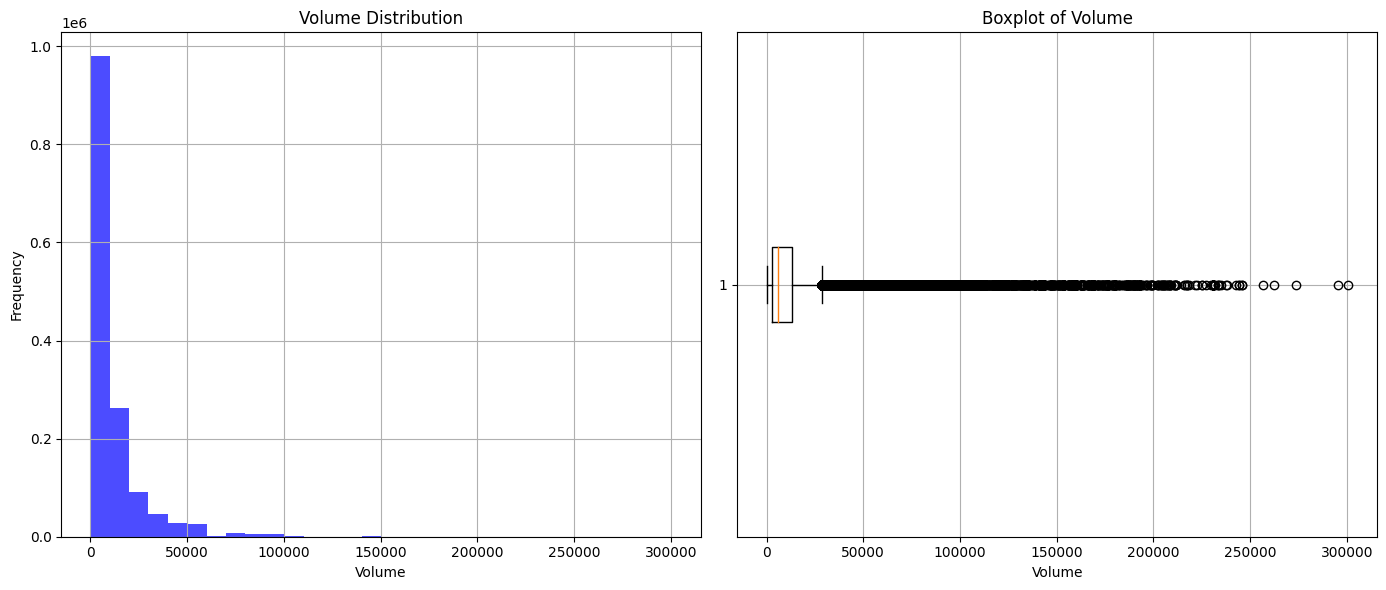

In [10]:
# Add a column named package_volume by multiplying DepthCM, HeightCM and WidthCM
df_package['package_volume'] = (df_package['DepthCM'] * df_package['HeightCM'] * df_package['WidthCM'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram on the first subplot (ax1)
ax1.hist(df_package['package_volume'], bins=30, color='blue', alpha=0.7)
ax1.set_title('Volume Distribution')
ax1.set_xlabel('Volume')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Plot the boxplot on the second subplot (ax2)
ax2.boxplot(df_package['package_volume'], vert=False)
ax2.set_title('Boxplot of Volume')
ax2.set_xlabel('Volume')
ax2.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

To get the overview, the average values of the depth, height and the width will be calculated below. 

In [11]:
# Calculate the average values of the DepthCM, HeightCM en WidthCM
average_depth = df_package['DepthCM'].mean()
average_height = df_package['HeightCM'].mean()
average_width = df_package['WidthCM'].mean()

# Print the average values
print(f"Average Depth (DepthCM): {average_depth}")
print(f"Average Height (HeightCM): {average_height}")
print(f"Average Width (WidthCM): {average_width}")

Average Depth (DepthCM): 34.085609662531965
Average Height (HeightCM): 10.204020786796374
Average Width (WidthCM): 24.793701374234395


To get a clear idea of what distribution of depth, height, and width we are looking at, boxplots have been created

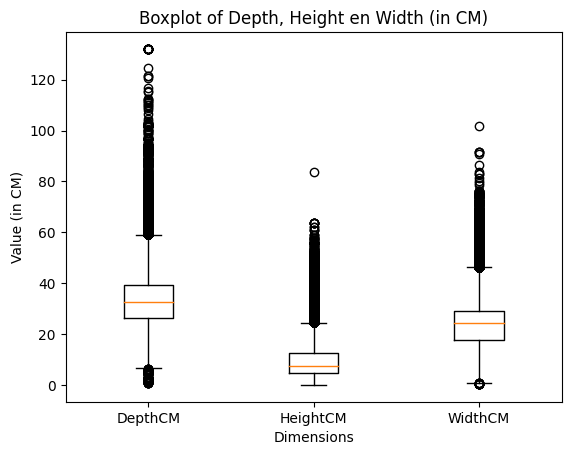

In [12]:
import matplotlib.pyplot as plt

# List the data for the boxplot
data_to_plot = [df_package['DepthCM'], df_package['HeightCM'], df_package['WidthCM']]

# Create a figure and a set of plots
fig, ax = plt.subplots()

# Make the boxplot
ax.boxplot(data_to_plot, labels=['DepthCM', 'HeightCM', 'WidthCM'])
ax.set_xlabel('Dimensions')
ax.set_ylabel('Value (in CM)')
plt.title('Boxplot of Depth, Height en Width (in CM)')

plt.show()

From the spread of the boxplot, many outliers are revealed. This can mean several things. It could say that there is a lot of variability in packet sizes, that there are many large packets or that there are many packets delivered that are exceptions from the rest of the packets.


For each parcel delivery service, the dimensions of parcels may vary. However, there is a common pattern: the depth is often the largest, the height is usually the smallest, and the width falls somewhere in between. 

In the graphs above, the depth, height, and width are depicted with their respective frequencies. From this, it's evident that there are certain dimensions that occur frequently. Furthermore, a general trend is observable: the depth is the largest (thus, most dispersed towards the right), the height is notably the smallest, and the width falls in between. 

As a result, we can conclude that within our dataset, we are dealing with parcels. Therefore, for the purposes of this study, we will assume that the objects are rectangular in shape.

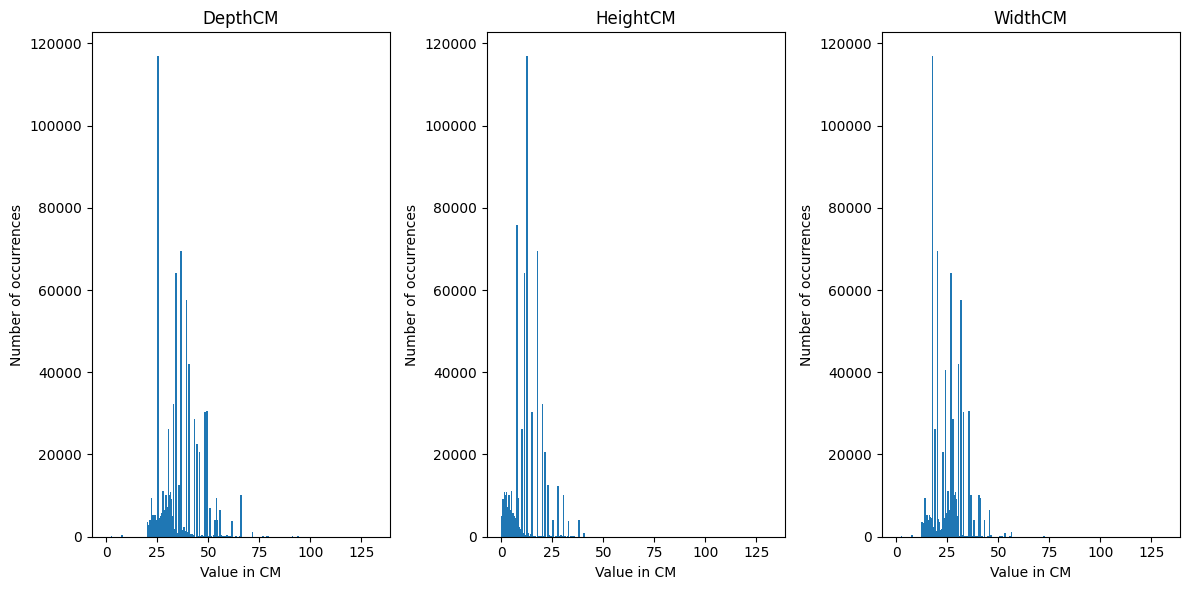

In [13]:
import matplotlib.pyplot as plt

# Group the values in the columns and count the number of occurrences
grouped = df_package.groupby(['DepthCM', 'HeightCM', 'WidthCM']).size().reset_index(name='Count')

# Make the graph
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True)  

# DepthCM
axes[0].bar(grouped['DepthCM'], grouped['Count'])
axes[0].set_xlabel('Value in CM')
axes[0].set_ylabel('Number of occurrences')
axes[0].set_title('DepthCM')

# HeightCM
axes[1].bar(grouped['HeightCM'], grouped['Count'])
axes[1].set_xlabel('Value in CM')
axes[1].set_ylabel('Number of occurrences')
axes[1].set_title('HeightCM')

# WidthCM
axes[2].bar(grouped['WidthCM'], grouped['Count'])
axes[2].set_xlabel('Value in CM')
axes[2].set_ylabel('Number of occurrences')
axes[2].set_title('WidthCM')

# Show graph
plt.tight_layout()
plt.show()

Nog schrijven

c:\Users\Merel\anaconda3\envs\TIL6022\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

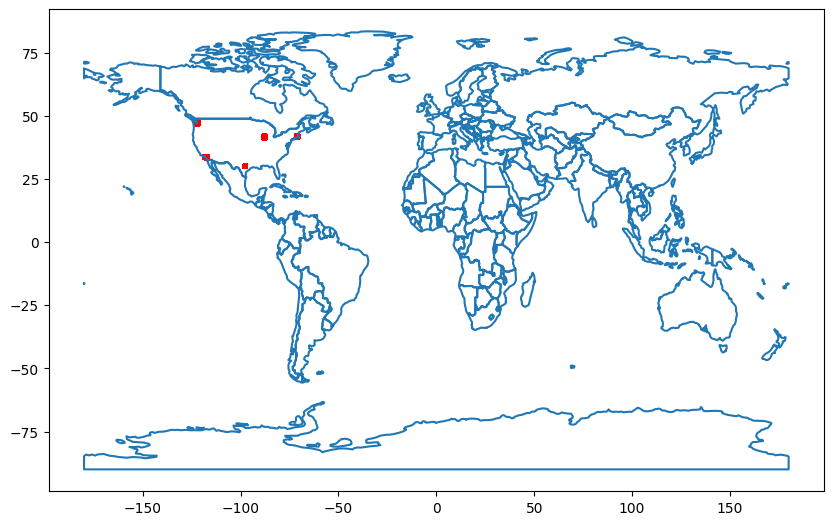

In [8]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df_route, geometry=gpd.points_from_xy(df_route['lng'], df_route['lat']), crs="EPSG:4326")

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

Nog schrijven

In [15]:
# Define expanded bounding boxes for each city
bounding_boxes = {
    'Seattle': {'north': 48.6, 'south': 46.2, 'west': -123.6, 'east': -121.0},
    'LosAngeles': {'north': 34.5, 'south': 33.2, 'west': -119, 'east': -116},
    'Austin': {'north': 30.7, 'south': 29.9, 'west': -98.1, 'east': -97.4},
    'Chicago': {'north': 43, 'south': 41.4, 'west': -88.8, 'east': -87.0},
    'Boston': {'north': 43, 'south': 41.0, 'west': -72.4, 'east': -69.7}
}

Nog schrijven

In [ ]:
# Load the Natural Earth shapefile data
world_countries = gpd.read_file("ne_10m_admin_0_countries.shp")
world_roads = gpd.read_file("ne_10m_roads_north_america.shp")
world_urban_areas = gpd.read_file("ne_10m_urban_areas.shp")

# Create and plot maps for each city with expanded boundaries, Natural Earth background, and additional layers
for city, bbox in bounding_boxes.items():
    city_df = df_route[
        (df_route['lat'] >= bbox['south']) &
        (df_route['lat'] <= bbox['north']) &
        (df_route['lng'] >= bbox['west']) &
        (df_route['lng'] <= bbox['east'])
    ]

    gdf = gpd.GeoDataFrame(city_df, geometry=gpd.points_from_xy(city_df['lng'], city_df['lat']), crs="EPSG:4326")
    city_bbox = bounding_boxes[city]

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the Natural Earth layers
    world_countries.plot(ax=ax, color='gray')
    world_roads.plot(ax=ax, color='lightgray', linewidth=0.5)
    world_urban_areas.plot(ax=ax, color='darkgray', alpha=0.7)

    # Color the markers by station code
    unique_station_codes = city_df['station_code'].unique()
    color_mapping = plt.cm.get_cmap('tab20', len(unique_station_codes))

    for station_code in unique_station_codes:
        station_df = city_df[city_df['station_code'] == station_code]
        station_gdf = gpd.GeoDataFrame(station_df, geometry=gpd.points_from_xy(station_df['lng'], station_df['lat']), crs="EPSG:4326")
        color = color_mapping(unique_station_codes.tolist().index(station_code))
        station_gdf.plot(ax=ax, marker='o', color=color, markersize=5, label=f'Station Code: {station_code}')

    ax.set_xlim(city_bbox['west'], city_bbox['east'])
    ax.set_ylim(city_bbox['south'], city_bbox['north'])
    ax.set_title(f'Routes in {city}')

    # Add a legend for station codes
    ax.legend(loc='upper right')

    # Show the map with background layers
    plt.show()

Nog schrijven

In [16]:
# Create dataframes for each city and station
city_station_dataframes = {}
for city, bbox in bounding_boxes.items():
    city_df = df_route[
        (df_route['lat'] >= bbox['south']) &
        (df_route['lat'] <= bbox['north']) &
        (df_route['lng'] >= bbox['west']) &
        (df_route['lng'] <= bbox['east'])
    ]
    unique_stations = city_df['station_code'].unique()
    station_dataframes = {}
    for station_code in unique_stations:
        station_dataframes[station_code] = city_df[city_df['station_code'] == station_code]
    city_station_dataframes[city] = station_dataframes

For testing we use only the data of Austin. Austin only has one station.

In [19]:
austin_routes = city_station_dataframes['Austin']['DAU1']

# Identify unique route IDs from Austin_route dataframe
austin_route_ids = austin_routes['RouteID'].unique()

# Create a dataframe for Austin packages by filtering based on route IDs
austin_packages_df = df_package[df_package['RouteID'].isin(austin_route_ids)]

In [20]:
display(austin_packages_df)

,PackageID,ScanStatus,StartTimeUTC,EndTimeUTC,PlannedServiceTimeSeconds,DepthCM,HeightCM,WidthCM,StopID,RouteID,package_volume
4231,PackageID_c89f3c60-e83a-46a0-9a5c-cae61ce25889,DELIVERED,NaN,NaN,63.0,33.5,2.0,20.8,AA,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,1393.600
4232,PackageID_d83df063-02f3-47e8-a34a-f490e244a971,DELIVERED,NaN,NaN,103.5,39.4,7.6,31.8,AD,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,9522.192
4233,PackageID_a979181d-f8c2-4d44-8976-50906a964877,DELIVERED,NaN,NaN,103.5,30.0,5.6,17.3,AD,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,2906.400
4234,PackageID_51bcf603-1334-48d0-ba7a-0c28df6ebda2,DELIVERED,NaN,NaN,95.5,49.5,7.6,35.6,AQ,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,13392.720
4235,PackageID_91514e2b-af1a-4abc-8fd7-ccbda44f5362,DELIVERED,NaN,NaN,95.5,30.5,10.2,19.1,AQ,RouteID_00930ddc-25f9-4371-a437-1e37c9d0a80d,5942.010
...,...,...,...,...,...,...,...,...,...,...,...
1456261,PackageID_267f659b-03af-4894-83c8-beee739a01be,DELIVERED,NaN,NaN,104.7,39.4,7.6,31.8,ZJ,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,9522.192
1456262,PackageID_48a5c8ac-7c3b-495d-847d-ab796affb919,DELIVERED,NaN,NaN,104.7,32.0,1.0,29.5,ZJ,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,944.000
1456263,PackageID_ea1ce1ed-bafe-411f-8589-89ba257632c6,DELIVERED,NaN,NaN,104.0,36.8,17.8,20.3,ZO,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,13297.312
1456264,PackageID_f078b1cf-4270-4f03-b16b-cf1880bcdcb3,DELIVERED,NaN,NaN,371.0,45.7,21.6,22.9,ZU,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,22605.048


# Heuristics (not ready yet)

I made a start with the heuristics and the code and text is given below. I made a small dummy dataset to check whether the heuristics work with this small dataset. This week I will continue with the heuristics!

## Bin packing 

First a model is built that can be used for the bin packing problem. However, this model is not developed to optimize the problem. This model will be used as the basic model which is, thereafter, **evolved** in steps into a model that can optimize the problem. During the modelling we will evaluate the models and there outcomes with eachother using visualizations. The idea is that with each update of the model, it is seen in the behaviour of the objective function. 

<h1>Vehicles</h1>

The packages are assigned to vehicles. A class for the vehicles is made in the code block below. 

In [13]:
# Class defining a vehicle
class Vehicle:
    
    def __init__(self, capacity):
        self._capacity = capacity
        self._packages = []
        self._load = 0
        
    # Checks if the package fits the vehicle
    def fits(self, package):
        return self.space_left() >= package
    
    # Recalculates the space left in the vehicle
    def space_left(self):
        return self._capacity - self._load
    
    # If possible, add the package to the vehicle
    def add_package(self, package):
        if not self.fits(package):
            raise Exception('The package with a volume of %i does not fit. Package: ' % package)
        self._packages.append(package)
        self._load += package
    
    def remove_package(self, package):
        for i in self._packages:
            if i == package:
                self._packages.remove(i)
                break
    
    def get_load(self):
        return self._load
    
    def __repr__(self):
        return 'Vehicle %s (%i)' % (self._packages, self.space_left())
    
    def __str__(self):
        return 'Vehicle %s (%i)' % (self._packages, self.space_left())

In [14]:
# Class defining a vehicle
class Storach:
    
    def __init__(self):
        self._packages = []
        self._load = 0
        
    # If possible, add the package to the vehicle
    def add_package(self, package):
        self._packages.append(package)
        self._load += package
    
    def remove_package(self, package):
        for i in self._packages:
            if i == package:
                self._packages.remove(i)
                break
    
    def space_left(self):
        return -1
    
    def get_load(self):
        return self._load
    
    def __repr__(self):
        return 'Storach %s ' % (self._packages)
    
    def __str__(self):
        return 'Storach %s ' % (self._packages)

For the basic heuristic the volume of the packages are given. It is assumed that if the volume fits the vehicle the packages fit the vehicle as well. This is assumed to reduce the complexity of the problem a little bit. assumption made was a good assumption

In [15]:
def next_fit(packages, volumes):
    
    # Take the first vehicle
    use_vehicle = Vehicle(volumes[0])
    vehicles = [use_vehicle]
    i = 1

    for package in packages:
        
        # Assign the package in the vehicle if the package fits
        if not use_vehicle.fits(package):
            use_vehicle = Vehicle(volumes[i])
            i += 1
            vehicles.append(use_vehicle)
        use_vehicle.add_package(package) 
            
    
    # return list of packages
    return vehicles

In [16]:
# Print solution of packages in a vertical
def print_solution(vehicles):
    space_left = 0
    for vehicle in vehicles:
        print(vehicle)
        if vehicle.space_left() != -1:
            space_left += vehicle.space_left()
    print('total space left:  %i' % space_left)

## Dummy data to test the code for now

In [17]:
vehicles_volumes = [100, 100, 100]

packages_volumes = [25, 25, 60, 50, 20, 10, 20]

vehicles = next_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [25, 25] (50)
Vehicle [60] (40)
Vehicle [50, 20, 10, 20] (0)
total space left:  90


In [2]:
def next_k_fit(packages, volumes, k):
    
    # List with used vehicles
    vehicles = []
    i = 0
    
    for package in packages:
        
        # Assign the package to the first vehicle it fits
        package_assigned = False
        for used_vehicle in vehicles[-k:]: 
            if used_vehicle.fits(package):
                used_vehicle.add_package(package)
                package_assigned = True
                break
                
        # add new empty box if needed
        if not package_assigned:
            used_vehicle = Vehicle(volumes[i])
            i += 1
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)

    
    # return list of boxes
    return vehicles

In [19]:
vehicles = next_k_fit(packages_volumes, vehicles_volumes, len(vehicles_volumes))
print_solution(vehicles)

Vehicle [25, 25, 50] (0)
Vehicle [60, 20, 10] (10)
Vehicle [20] (80)
total space left:  90


## Heuristic minimizing left over capacity

below a example with 3 vehicles with respectively 100, 90, and 80 volume. the packages are chosen in order and the algorithm finds a solution by assigning the first twp packages to the first vehicle, the second two to the second vehicle and the third two to the last vehicle leaving one package unassigned. In theory all packages should fit in the three vehicles. A new algorithm is made that can reasign packages while trying to find the best allocation for all packages to the available vehicles. It does this by minimizing the total space left.

- first soort on big packages
- 

In [3]:
vehicles_volumes = [100, 90, 80]

packages_volumes = [40, 40, 30, 50, 30, 30, 50]

vehicles = next_k_fit(packages_volumes, vehicles_volumes, len(vehicles_volumes))
print_solution(vehicles)

NameError: name 'Vehicle' is not defined

TODO:
Ik wil dat hij maar 1 vehicle of iets anders aan maakt met niet gealloceerde paketten. Daarnaast moet hij zien dat bij bijv veh 3 een plek van 40 over is en zoeken of er ergens een pakket can 40 is en die verplaatsen en zo schuiven tot alles goed vol zit. 

In [21]:
def allocation_packages(packages, volumes):

    # initialize boxes
    vehicles = []
    i = 0
    #not_assigned = []
    
    for package in packages:
        
        # Find the best vehicle
        best_vehicle = None
        for vehicle in vehicles:
            if vehicle.fits(package) and (not best_vehicle or vehicle.space_left() < best_vehicle.space_left()):
                best_vehicle = vehicle
        
        # Pick the next vehicle
        if best_vehicle == None:
            if i < len(volumes):
                vehicle = Vehicle(volumes[i])
                i += 1
                vehicle.add_package(package)
                vehicles.append(vehicle)
            else:
                not_assigned = Storach()
                not_assigned.add_package(package)
                '''no_vehicle_left = Vehicle(9999)
                no_vehicle_left.add_package(package)
                vehicles.append(vehicle)'''
                vehicles.append(not_assigned)
            
        # or add item to the best box
        else:
            best_vehicle.add_package(package)
        
        
    # return list of boxes
    return vehicles
    

In [22]:
vehicles_volumes = [100, 90, 80]

packages_volumes = [40, 40, 30, 50, 30, 30, 50]


vehicles = allocation_packages(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [40, 40] (20)
Vehicle [30, 50] (10)
Vehicle [30, 30] (20)
Storach [50] 
total space left:  50


Next, the first fit model is implemented, which places the package in the first vehicle if it fits.
In case the item doesn't fit, the package will be stored in a new vehicle.

In [9]:
# First Fit model
def first_fit(packages, volumes):
    vehicles = []
    i = 0

    for package in packages:
        for used_vehicle in vehicles:
            if used_vehicle.fits(package):
                used_vehicle.add_package(package)
                break
        else:
            used_vehicle = Vehicle(volumes[i])
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)
            i += 1

    return vehicles

In [23]:
# Test First Fit model
packages_volumes = [10, 30, 10, 20, 10]
vehicles_volumes = [50, 50]
vehicles = first_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [10, 30, 10] (0)
Vehicle [20, 10] (20)
total space left:  20


Lastly, the best fit model is developed which places the package in the fullest vehicle by keeping track of the best vehicle to place the package in.
If the package doesn't fit in any of the vehicles, a new vehicle is added.

In [24]:
# Best Fit model
def best_fit(packages, volumes):
    vehicles = []
    i = 0

    for package in packages:
        best_vehicle = None
        for used_vehicle in vehicles:
            if used_vehicle.fits(package) and (not best_vehicle or used_vehicle.space_left() < best_vehicle.space_left()):
                best_vehicle = used_vehicle
        
        if best_vehicle is None:
            used_vehicle = Vehicle(volumes[i])
            vehicles.append(used_vehicle)
            used_vehicle.add_package(package)
            i += 1

    return vehicles

In [25]:
# Test Best Fit model
vehicles = best_fit(packages_volumes, vehicles_volumes)
print_solution(vehicles)

Vehicle [10] (40)
total space left:  40


## Heuristics chapter stops here
